In [1]:
import pickle
from utils import *
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

/opt/conda/envs/klue/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)

In [3]:
with open('dict_num_to_label.pkl', 'rb') as f:
    dict_num_to_label = pickle.load(f)

In [4]:
def label_to_num(label):
  num_label = []
  with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [5]:
train_dataset = load_data("./dataset/train/alternate_train.csv")
train_label = label_to_num(train_dataset['label'].values)

In [6]:
raw_data = pd.read_csv("./dataset/train/alternate_train.csv", sep='\t', engine='python')

In [7]:
raw_data.head(10)

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
5,5,": 유엔, 유럽 의회, 북대서양 조약 기구 (NATO), 국제이주기구, 세계 보건 ...","{'word': '북대서양 조약 기구', 'start_idx': 13, 'end_i...","{'word': 'NATO', 'start_idx': 25, 'end_idx': 2...",org:alternate_names,wikipedia
6,6,그에 따라 나폴리와 계약을 연장한 마라도나는 1989년 팀을 UEFA컵 정상으로 인...,"{'word': 'AC 밀란', 'start_idx': 64, 'end_idx': ...","{'word': '1989', 'start_idx': 25, 'end_idx': 2...",no_relation,wikipedia
7,7,"박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ ...","{'word': '박용오', 'start_idx': 0, 'end_idx': 2, ...","{'word': '1937년 4월 29일', 'start_idx': 9, 'end_...",per:date_of_birth,wikipedia
8,8,중공군에게 온전히 대항할 수 없을 정도로 약해진 국민당은 타이베이로 수도를 옮기는 ...,"{'word': '중화민국', 'start_idx': 59, 'end_idx': 6...","{'word': '타이베이', 'start_idx': 32, 'end_idx': 3...",org:place_of_headquarters,wikipedia
9,9,"특히 김동연 전 경제부총리를 비롯한 김두관 국회의원, 안규백 국회의원, 김종민 국회...","{'word': '안규백', 'start_idx': 30, 'end_idx': 32...","{'word': '더불어민주당', 'start_idx': 100, 'end_idx'...",per:employee_of,wikitree


In [9]:
MODEL_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
added_token_num = tokenizer.add_special_tokens({"additional_special_tokens":["[SUBJ]", "[/SUBJ]", "[OBJ]", "[/OBJ]"]})
tokenized_train = tokenized_dataset(train_dataset, tokenizer)
RE_train_dataset = RE_Dataset(tokenized_train, train_label)

In [10]:
print(len(RE_train_dataset))

32428


In [23]:
print(RE_train_dataset[2]['input_ids'][:60])
print(RE_train_dataset[2]['entity_ids'][:60])

tensor([    0,    47, 17665,  2302, 27135,  4610,    21,  2090,  2138,  4214,
         2088,  1513,  2259, 32000,  4104, 10904, 32001,   793,  3625,  4210,
         2210, 32002,  3629, 17287, 20212, 32003,  4500,  8862,  4415,  4422,
         2522,  4852,  4422,  2138,  6157,  2227,   114,  1872, 14198,  2290,
          115,   604,   114,  6646, 14198,  2290,   115,  1498,  4812,  2371,
         2062,    18,     2,     1,     1,     1,     1,     1,     1,     1])


In [12]:
print(len(tokenized_train.input_ids))

32428


In [23]:
tokenized_train.input_ids[0]

tensor([    0,   168, 30985, 14451,  7088,  4586,   169,   793, 32002,  8373,
        14113,  2234, 32003,  1504,  1363,  2088, 32000, 29830, 32001,   543,
        14879,  2440,  6711,   170, 21406, 26713,  2076, 25145,  5749,   171,
         1421,   818,  2073,  4388,  2062,    18,     2,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1, 

In [12]:
from collections import Counter
counter = Counter()
for tokenized_sentence in tokenized_train.input_ids:
    counter.update(tokenized_sentence.numpy())

토큰화된 학습 문장 최대 길이 : 235
토큰화된 학습 문장의 평균 길이 : 56.90757622420696
32470


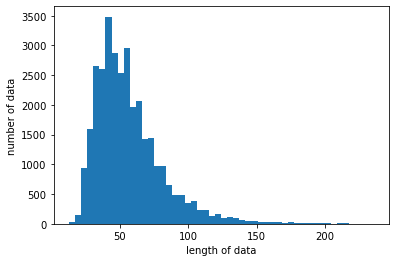

In [14]:
#토큰화된 학습 문장의 길이조사
print('토큰화된 학습 문장 최대 길이 :',max(sum(l).numpy() for l in tokenized_train.attention_mask))
print('토큰화된 학습 문장의 평균 길이 :',sum(sum(l).numpy() for l in tokenized_train.attention_mask)/len(tokenized_train.attention_mask))
print(len(tokenized_train.attention_mask))
values = [int(sum(l).numpy()) for l in tokenized_train.attention_mask]
plt.hist(values, bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [15]:
# train 데이터셋에서 UNK 토큰이 있나 확인함(0.3317%)
print(f"총 문장 개수 : {len(tokenized_train.input_ids)}")
cnt = sum(sum((tokenized_train.input_ids == 3))).numpy()
total_words = sum(sum(tokenized_train.attention_mask)).numpy()

print(f"[UNK] 토큰 개수 : {cnt}")
print(f"전체 토큰 개수(PAD제외) : {total_words}")
print(f"[UNK] 비율 : {cnt / total_words * 100}%")

총 문장 개수 : 32470
[UNK] 토큰 개수 : 6315
전체 토큰 개수(PAD제외) : 1847789
[UNK] 비율 : 0.34175980049670174%


In [16]:
test_dataset = load_data("./dataset/test/alternate_test.csv")
tokenized_test = tokenized_dataset(test_dataset, tokenizer)

In [35]:
train_dataset['label'].values

array(['no_relation', 'no_relation', 'org:member_of', ...,
       'org:top_members/employees', 'no_relation',
       'org:top_members/employees'], dtype=object)

In [30]:
tokenizer.decode(tokenized_test.input_ids[0], skip_special_tokens=True)

"지난 15일 MBC'탐사기획 스트레이트'가 이 사실을 보도했다."

In [33]:
test_dataset.label[0]

100

In [17]:
print(test_dataset[:10])

   id                                           sentence subject_entity  \
0   0               지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.            MBC   
1   1  사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...        프린세스 프링   
2   2  한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...             경찰   
3   3  정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...             세조   
4   4  당시 민주당 이진련 시의원은 권영진 시장에게 "긴급 생계자금을 왜 현금으로 지원하지...            민주당   
5   5  미국은 필리핀 측에서는 동맹이 아니라 지배자가 되었다고 볼 수 있기 때문에, 필리핀...            필리핀   
6   6  한국당 전희경 대변인은 이날 정 총리 후보자 지명 직후 논평을 내고 "의회를 시녀화...            전희경   
7   7  문재인 대통령 부인 김정숙 여사는 22일부터 1박2일 일정으로 광주를 방문해 경기를...            문재인   
8   8  조선민주주의인민공화국 관할 지역은 개풍군 영북면 월고리 및 연천군 서남면 지역을 합...    조선민주주의인민공화국   
9   9         소련군에서 그의 이름도 중국식의 진지첸으로 조선인으로서의 정체성도 희박했다.            소련군   

  object_entity subject_span object_span  label  
0    탐사기획 스트레이트       (7, 9)    (12, 21)    100  
1            공주      (7, 13)    (84, 85)    100  
2         1995년   (121, 

토큰화된 테스트 문장 최대 길이 : 227
토큰화된 테스트 문장의 평균 길이 : 55.15054732775274
7765


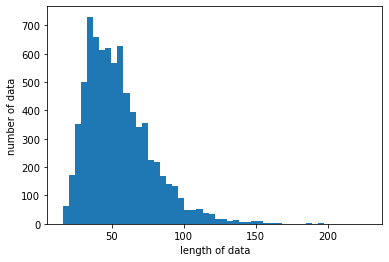

In [19]:
#토큰화된 테스트 문장의 길이조사
print('토큰화된 테스트 문장 최대 길이 :',max(sum(l).numpy() for l in tokenized_test.attention_mask))
print('토큰화된 테스트 문장의 평균 길이 :',sum(sum(l).numpy() for l in tokenized_test.attention_mask)/len(tokenized_test.attention_mask))
print(len(tokenized_test.attention_mask))
values = [int(sum(l).numpy()) for l in tokenized_test.attention_mask]
plt.hist(values, bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [21]:
# test 데이터셋에서 UNK 토큰이 있나 확인함(0.2202%)
print(f"총 문장 개수 : {len(tokenized_test.input_ids)}")
cnt = sum(sum((tokenized_test.input_ids == 3))).numpy()
total_words = sum(sum(tokenized_test.attention_mask)).numpy()

print(f"[UNK] 토큰 개수 : {cnt}")
print(f"전체 토큰 개수(PAD제외) : {total_words}")
print(f"[UNK] 비율 : {(cnt / total_words) * 100}%")

총 문장 개수 : 7765
[UNK] 토큰 개수 : 925
전체 토큰 개수(PAD제외) : 428244
[UNK] 비율 : 0.21599835607737644%


In [ ]:
문장에서 1번만 나온 단어는 지워버릴수 있음!!!
데이터 전처리를 다시 한번 확인해봐야함, 토크나이저
loss의 의미 KL Divergence 이해(면접단골)
yaml 사용해보기

In [ ]:
text = "[SUBJ]이순신[/SUBJ]은 조선 중기의 [OBJ]무신[/OBJ]이다."
tokenized_text = tokenizer.tokenize(text, add_special_tokens=True)

In [ ]:
print(tokenized_text)

In [ ]:
input_ids = tokenizer.encode(text, add_special_tokens=True)

In [ ]:
print(input_ids)

In [ ]:
decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids)
decoded_ids = tokenizer.decode(input_ids,skip_special_tokens=True)
print(decoded_ids)

In [3]:
import re
first = True
alternate_delimiter = "\t"
new_file = open("./dataset/train/alternate_train.csv", 'a')
with open("./dataset/train/train.csv", 'r') as f:
    while True:
        line = f.readline()
        if first:
            line = line.replace(",", alternate_delimiter)
            first = False
            new_file.write(line)
            continue
        if not line:
            break
        line = re.sub(',', alternate_delimiter, line, 1) # 처음 만나는 comma를 교체함(id)
        for _ in range(2): # 맨 뒤에 2개의 comma를 교체함
            comma_idx = line.rfind(',')
            line = line[:comma_idx] + alternate_delimiter + line[comma_idx+1:]
        line = re.sub(",\"{'word':", alternate_delimiter + "\"{'word':", line) # 나머지 중간의 2개의 comma를 교체함
        new_file.write(line)

new_file.close()
print("Finished!")

Finished!


In [4]:
import re
first = True
alternate_delimiter = "\t"
new_file = open("./dataset/test/alternate_test.csv", 'a')
with open("./dataset/test/test_data.csv", 'r') as f:
    while True:
        line = f.readline()
        if first:
            line = line.replace(",", alternate_delimiter)
            first = False
            new_file.write(line)
            continue
        if not line:
            break
        line = re.sub(',', alternate_delimiter, line, 1) # 처음 만나는 comma를 교체함(id)
        for _ in range(2): # 맨 뒤에 2개의 comma를 교체함
            comma_idx = line.rfind(',')
            line = line[:comma_idx] + alternate_delimiter + line[comma_idx+1:]
        line = re.sub(",\"{'word':", alternate_delimiter + "\"{'word':", line) # 나머지 중간의 2개의 comma를 교체함
        new_file.write(line)

new_file.close()
print("Finished!")

Finished!
